<a href="https://colab.research.google.com/github/aimiliavaitsi/Biopliastics_Sentiment_Project/blob/main/Preprocessing_and_Sentiment_Analysis_per_Year_and_QTR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Saving Only Reddit Data.xlsx to Only Reddit Data (7).xlsx


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

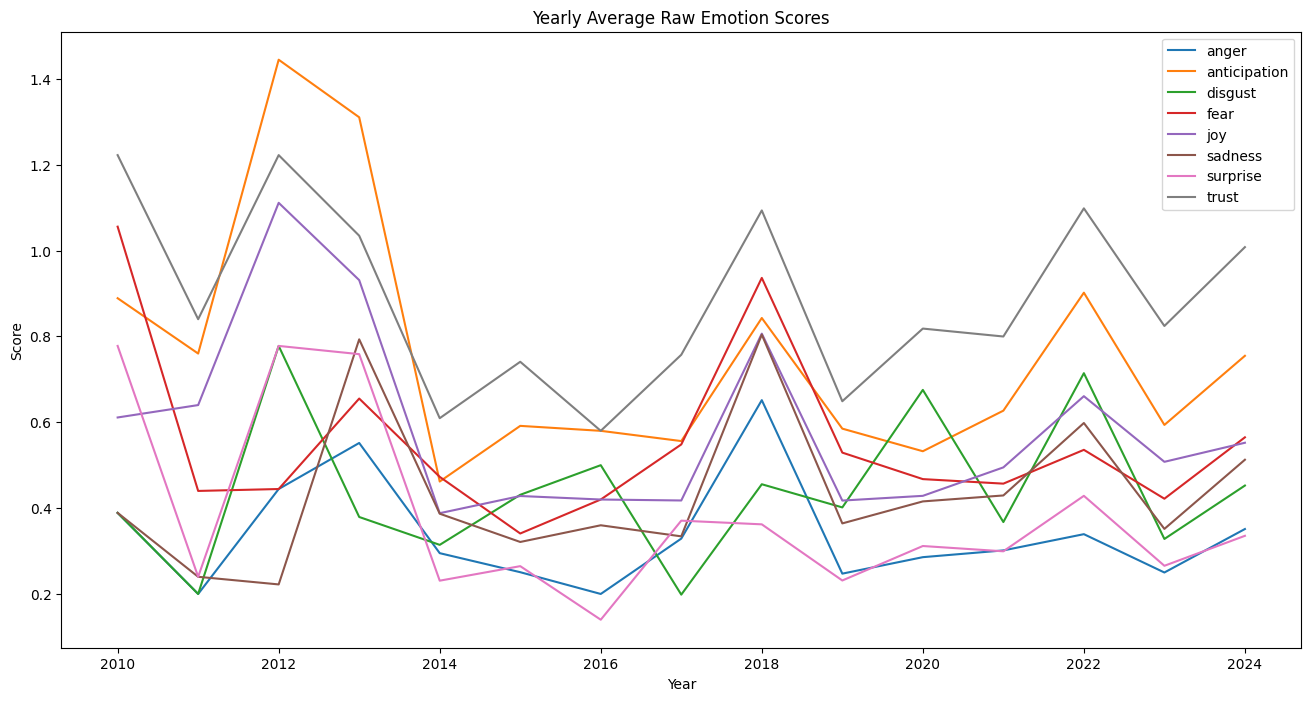

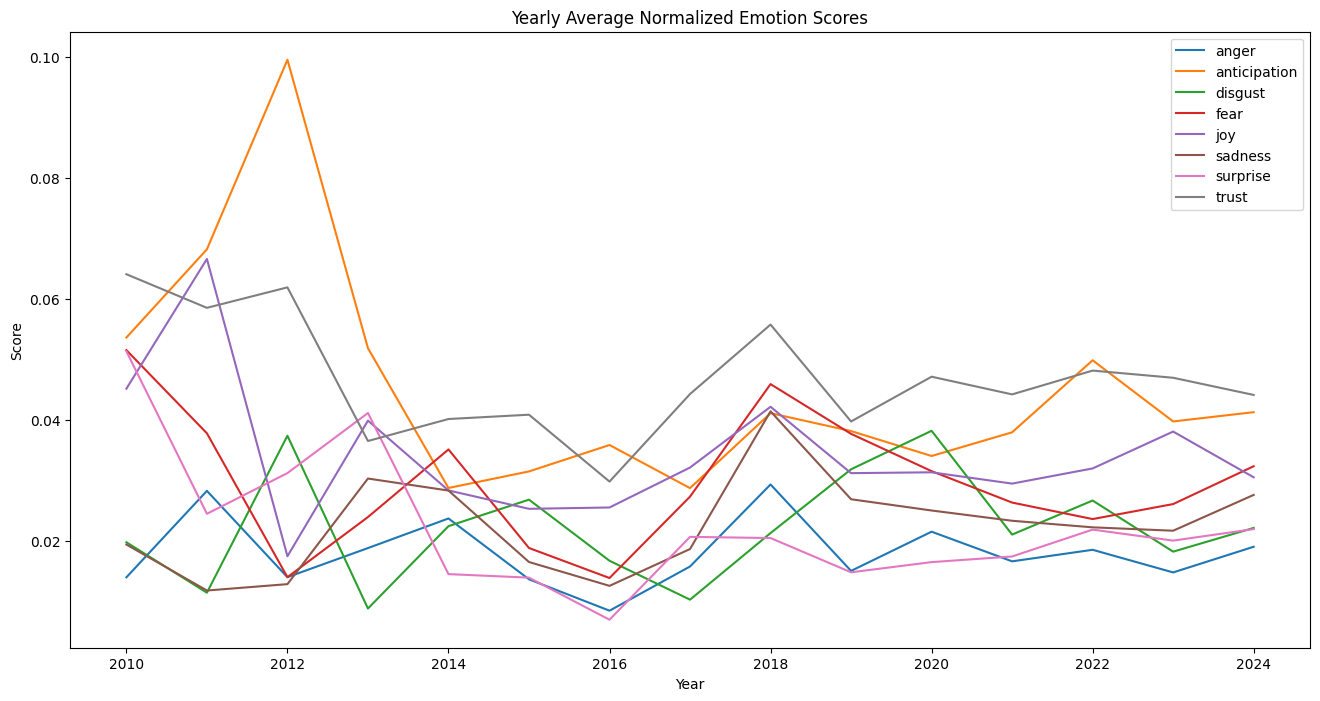

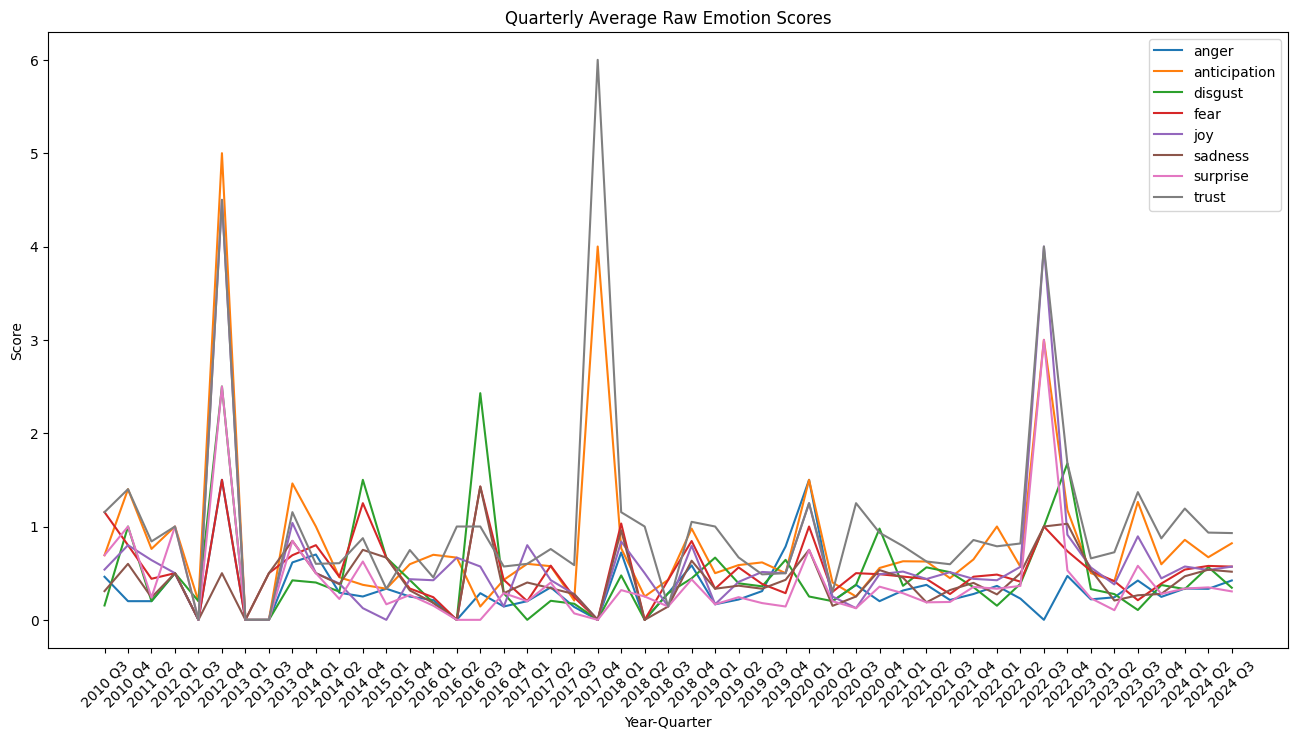

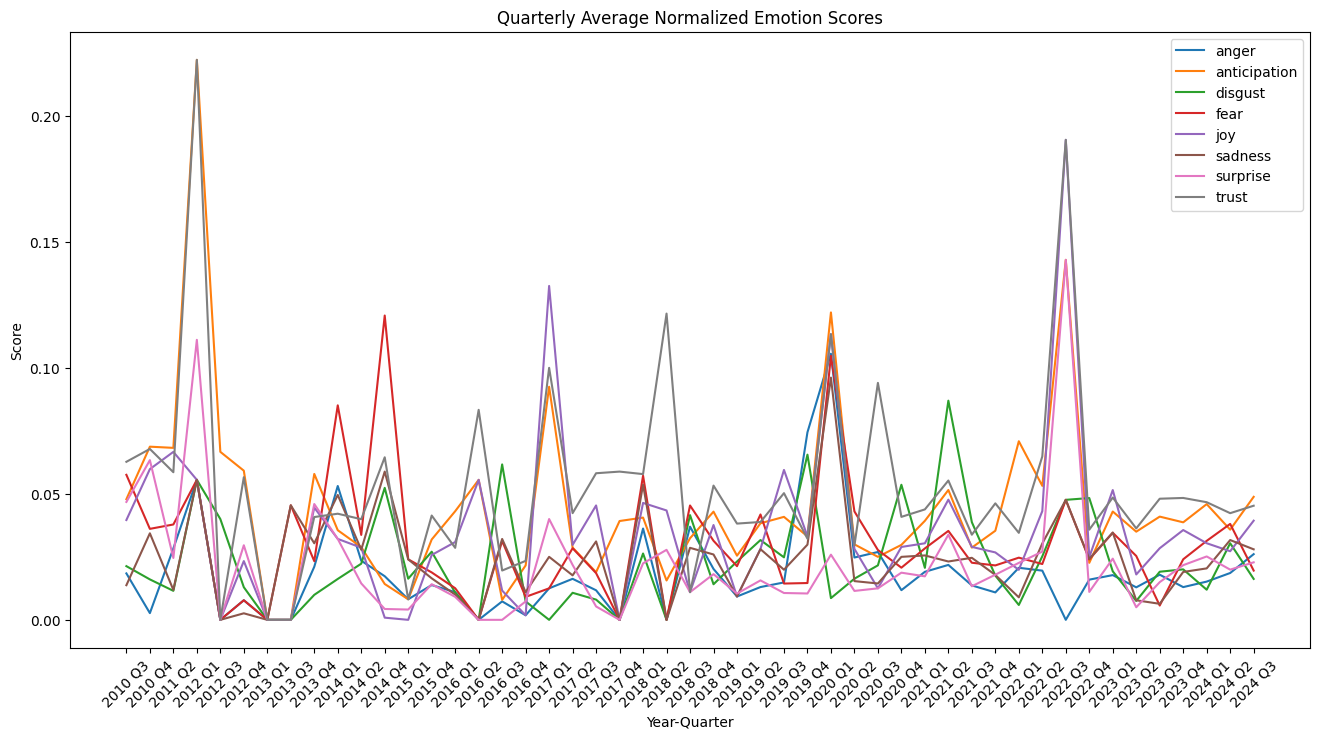

In [ ]:
# Import libraries
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from nrclex import NRCLex

# Upload the Excel file
uploaded = files.upload()

# Load the data
df = pd.read_excel(next(iter(uploaded.keys())))

# Pre-process the text
def preprocess_text(text):
    tokens = word_tokenize(str(text).lower())
    tokens = [word for word in tokens if word.isalpha() and word not in stopwords.words('english')]
    return ' '.join(tokens)

df['Cleaned_Comment'] = df['Comment'].apply(preprocess_text)

# Function to get emotion scores using NRC Lexicon
def get_emotion_scores(text):
    emotions = NRCLex(text)
    emotion_scores = emotions.raw_emotion_scores
    return emotion_scores

# Apply the emotion scoring function
df['Emotion_Scores'] = df['Cleaned_Comment'].apply(get_emotion_scores)

# Convert the emotion scores into separate columns and handle missing emotions
emotion_categories = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']
for emotion in emotion_categories:
    df[emotion] = df['Emotion_Scores'].apply(lambda x: x.get(emotion, 0))

# Normalize emotion scores by word count
df['Word_Count'] = df['Cleaned_Comment'].apply(lambda x: len(x.split()))
for emotion in emotion_categories:
    df[f'Normalized_{emotion}'] = df[emotion] / df['Word_Count']

# Save the results to an Excel file
output_file = "Emotion_Scores.xlsx"
df.to_excel(output_file, index=False)
files.download(output_file)

# Group data by Year and Year-Quarter
yearly_emotions = df.groupby('Year')[emotion_categories + [f'Normalized_{e}' for e in emotion_categories]].mean().reset_index()
quarterly_emotions = df.groupby('Year-Quarter')[emotion_categories + [f'Normalized_{e}' for e in emotion_categories]].mean().reset_index()

# Plot line charts for raw and normalized scores by Year
plt.figure(figsize=(16, 8))
for emotion in emotion_categories:
    plt.plot(yearly_emotions['Year'], yearly_emotions[emotion], label=emotion)

plt.title('Yearly Average Raw Emotion Scores')
plt.xlabel('Year')
plt.ylabel('Score')
plt.legend()
plt.show()

plt.figure(figsize=(16, 8))
for emotion in emotion_categories:
    plt.plot(yearly_emotions['Year'], yearly_emotions[f'Normalized_{emotion}'], label=emotion)

plt.title('Yearly Average Normalized Emotion Scores')
plt.xlabel('Year')
plt.ylabel('Score')
plt.legend()
plt.show()

# Plot line charts for raw and normalized scores by Year-Quarter
plt.figure(figsize=(16, 8))
for emotion in emotion_categories:
    plt.plot(quarterly_emotions['Year-Quarter'], quarterly_emotions[emotion], label=emotion)

plt.title('Quarterly Average Raw Emotion Scores')
plt.xlabel('Year-Quarter')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend()
plt.show()

plt.figure(figsize=(16, 8))
for emotion in emotion_categories:
    plt.plot(quarterly_emotions['Year-Quarter'], quarterly_emotions[f'Normalized_{emotion}'], label=emotion)

plt.title('Quarterly Average Normalized Emotion Scores')
plt.xlabel('Year-Quarter')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend()
plt.show()


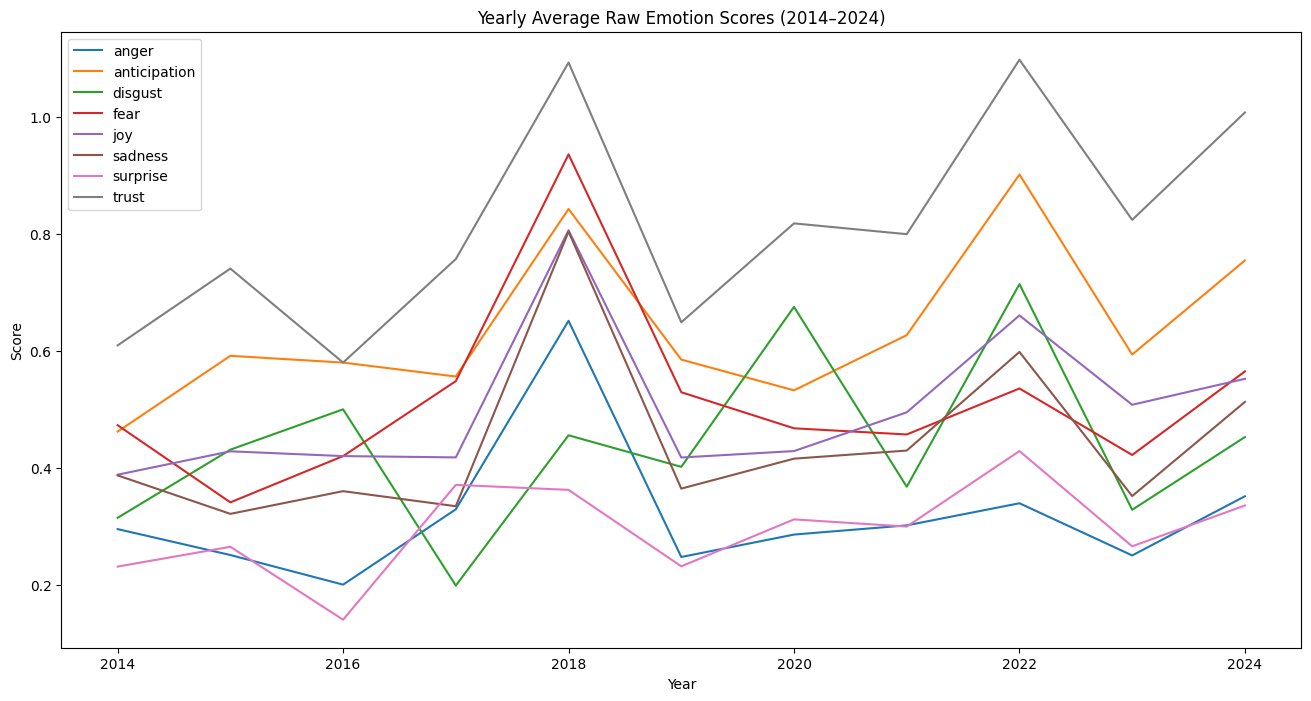

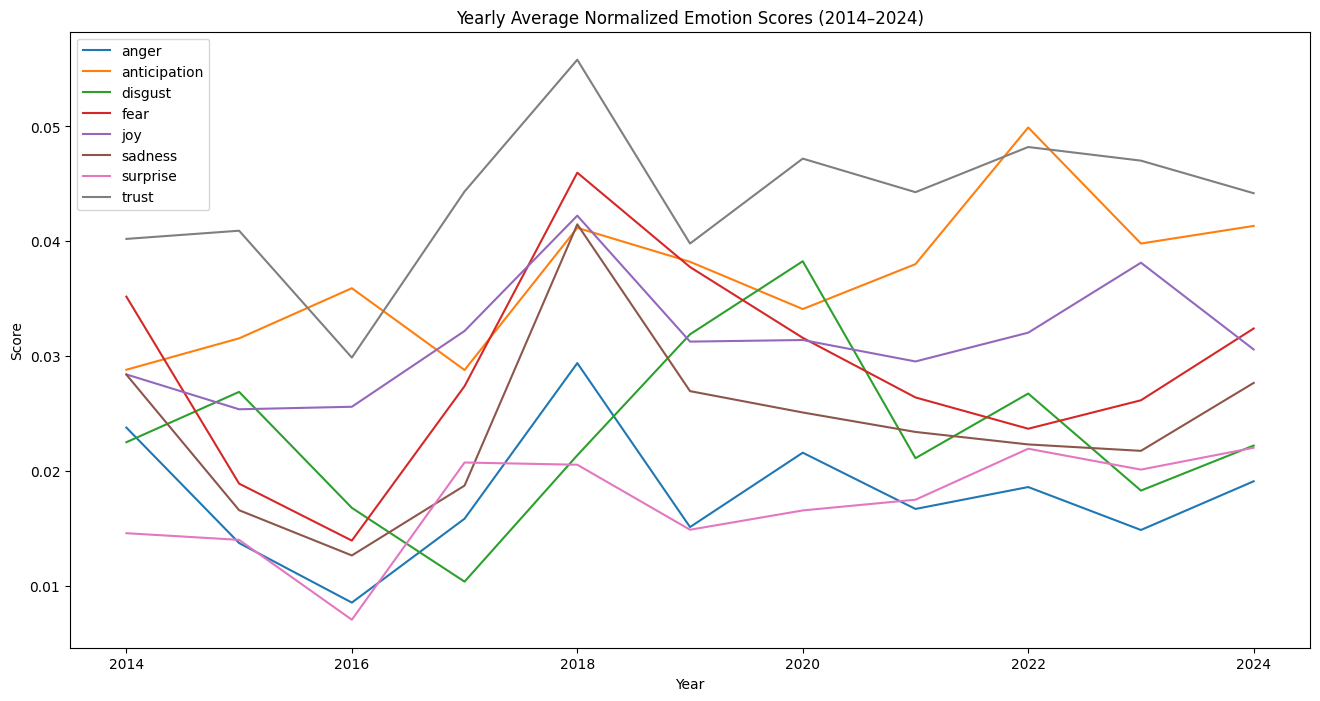

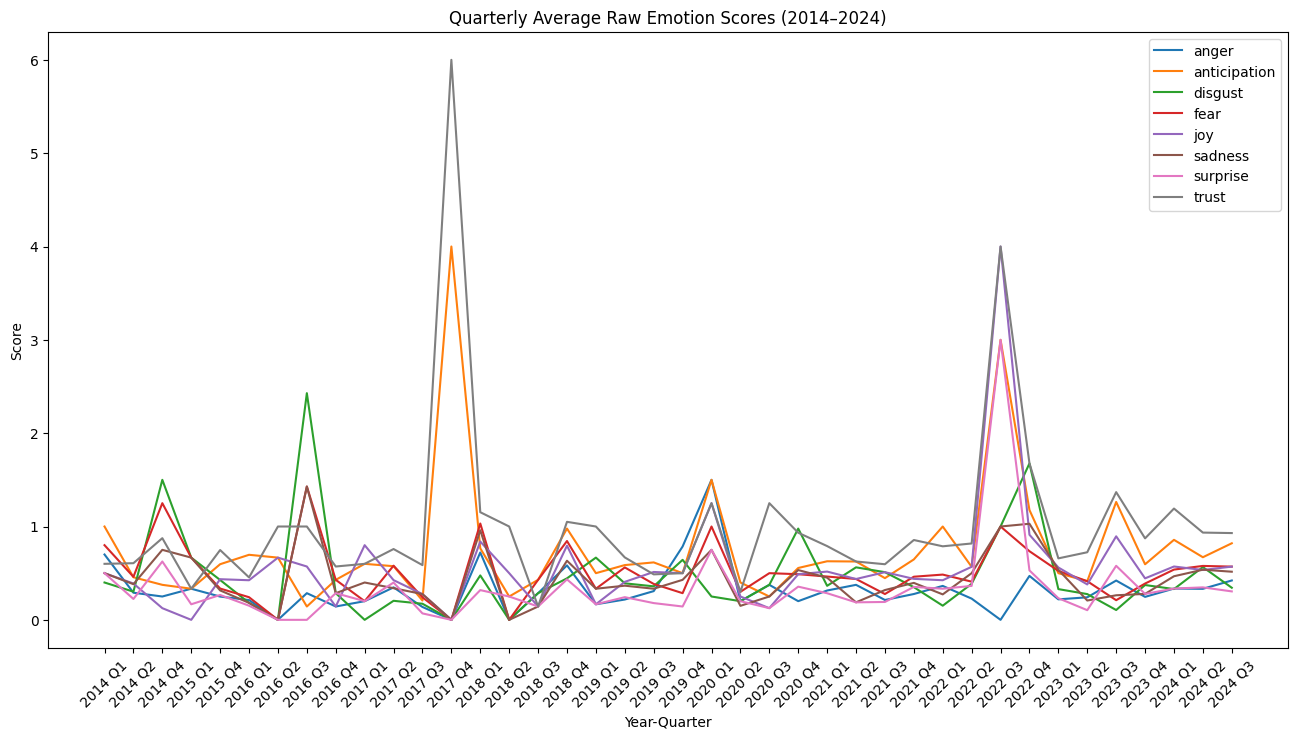

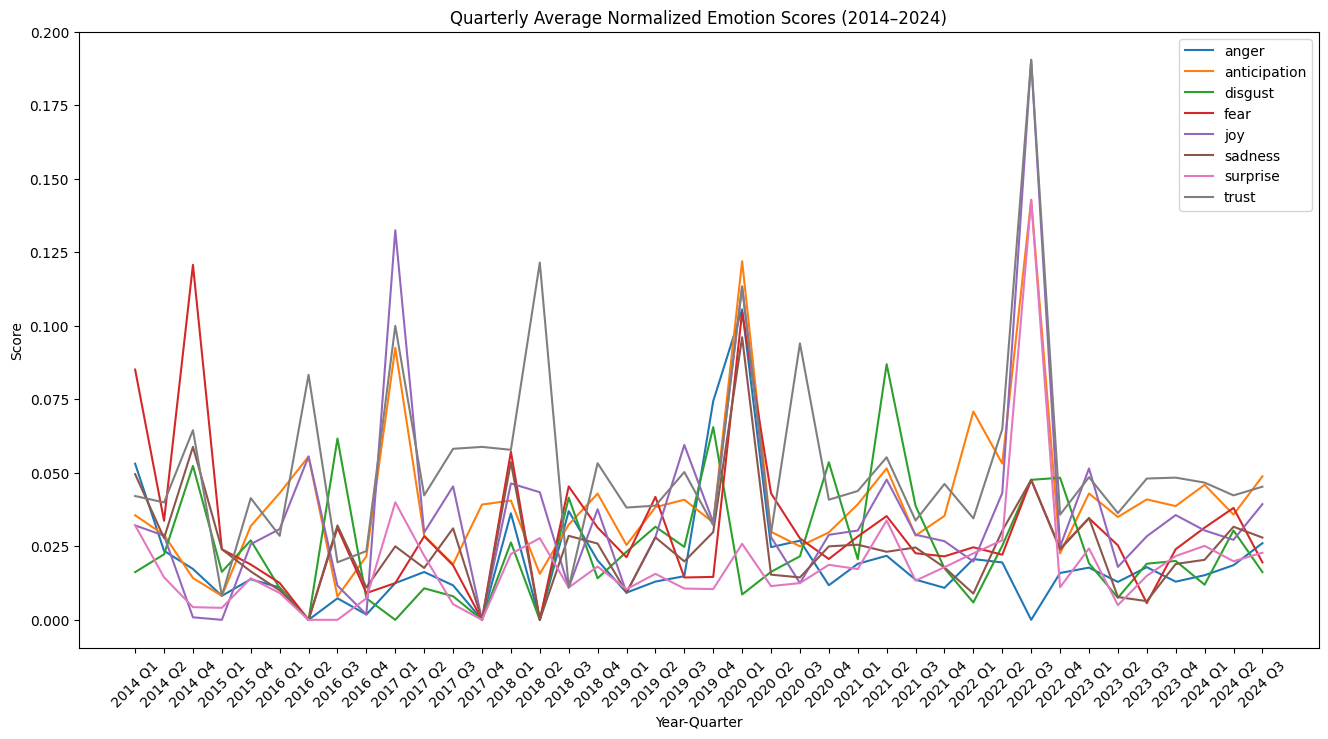

In [ ]:
# Filter data for the years 2014 to 2024
filtered_yearly_emotions = yearly_emotions[(yearly_emotions['Year'] >= 2014) & (yearly_emotions['Year'] <= 2024)]
filtered_quarterly_emotions = quarterly_emotions[(quarterly_emotions['Year-Quarter'].str[:4].astype(int) >= 2014) &
                                                 (quarterly_emotions['Year-Quarter'].str[:4].astype(int) <= 2024)]

# Plot line charts for raw and normalized scores by Year (2014–2024)
plt.figure(figsize=(16, 8))
for emotion in emotion_categories:
    plt.plot(filtered_yearly_emotions['Year'], filtered_yearly_emotions[emotion], label=emotion)

plt.title('Yearly Average Raw Emotion Scores (2014–2024)')
plt.xlabel('Year')
plt.ylabel('Score')
plt.legend()
plt.show()

plt.figure(figsize=(16, 8))
for emotion in emotion_categories:
    plt.plot(filtered_yearly_emotions['Year'], filtered_yearly_emotions[f'Normalized_{emotion}'], label=emotion)

plt.title('Yearly Average Normalized Emotion Scores (2014–2024)')
plt.xlabel('Year')
plt.ylabel('Score')
plt.legend()
plt.show()

# Plot line charts for raw and normalized scores by Year-Quarter (2014–2024)
plt.figure(figsize=(16, 8))
for emotion in emotion_categories:
    plt.plot(filtered_quarterly_emotions['Year-Quarter'], filtered_quarterly_emotions[emotion], label=emotion)

plt.title('Quarterly Average Raw Emotion Scores (2014–2024)')
plt.xlabel('Year-Quarter')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend()
plt.show()

plt.figure(figsize=(16, 8))
for emotion in emotion_categories:
    plt.plot(filtered_quarterly_emotions['Year-Quarter'], filtered_quarterly_emotions[f'Normalized_{emotion}'], label=emotion)

plt.title('Quarterly Average Normalized Emotion Scores (2014–2024)')
plt.xlabel('Year-Quarter')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend()
plt.show()
